In [7]:
# Import
from plots import *
from PMs import *

import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import math
import ptf
import seaborn as sns
from matplotlib.pyplot import figure
#import Es_graph2
#import graphs
from mpl_toolkits import mplot3d
from sklearn import linear_model

e_0 = 8.8541878128e-12
fc = 50000000
pi = 3.141592653589793
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
"""     Reading the data of the MS and XRF  """

df = pd.read_excel("MS_XRF_text.xlsx")

                  ############################# FILTERS! ###############################
    
df = df[df.Kim_F1 > 0]

#df = df[(df.kfd > 0) & (df.kfd < 25)]
#df.to_excel("MS_XRF_.xlsx")

In [9]:
df.describe()

,NUMBER,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,Ni,Ni Error,Co,Co Error,Fe,Fe Error,Mn,Mn Error,Cr,Cr Error,V,V Error,Ti,Ti Error,Ca,Ca Error,K,K Error,S,S Error,Ba,Ba Error,Sb,Sb Error,Sn,Sn Error,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
count,364.000000,364.000000,364.000000,3.640000e+02,3.640000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.0,364.000000,364.0,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.0,364.0,364.0,364.0,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,204.524725,361.227885,66.412088,1.526321e-04,6.609510e-06,4.916374,14.605332,539.420330,3.008242,0.000144,4.267526e-07,2.413407,10.933464,10.324392,0.609072,8.127011,8.302971e+05,0.0,3205.650357,0.0,107995.669973,0.0,5.759313,1.407170,375.133819,2.972967,75.849368,1.441236,0.008709,3.033297,52.918462,1.440027,4.793269,1.298104,16.568324,2.190989,0.0,3.167500,0.0,1.710879,7.927610,2.058599,0.079341,4.049780,41.918984,3.599478,0.050027,16.289066,11.782170,5.821841,5.646291,14.699478,18.664203,44.100852,19131.817060,110.303709,364.772143,26.342390,78.480742,6.996071,53.183791,10.596236,3080.593764,39.989643,14669.150165,164.858571,12072.014835,131.639835,551.847775,47.266951,153.672775,22.855055,0.436236,7.068297,1.765797,6.099560,0.402143,6.390907,0.571703,3.806209,0.668077,5.130385,502428.569093,1108.240549,7.916099,1.047170,2.999560,1.888324,0.0,1.5,0.0,1.5,0.0,1.5,57140.566181,1150.641181,277.994945,260.780879,387989.262665,1058.316978,3.841456,18.382747,1762.000962,1229.336841,7.221758,12.475659,1.293297,8.798104,0.475962,19.099423,25.142857,1.568819,67.304945,6.056511,1.187126,7.127143,9.612425,15.174323,12.338320,24.359745,36.698065,37.800411,10.327202,48.127613,1.428402,1.920879
std,114.580427,0.713053,42.755316,1.357591e-04,5.868093e-06,11.171788,1.418458,199.153157,0.090534,0.000128,1.824701e-06,14.403248,9.907599,9.372780,0.608753,28.565444,1.102065e+05,0.0,2119.171417,0.0,28997.354382,0.0,2.503899,0.139177,164.960814,0.722487,42.307563,0.392081,0.166153,0.487035,21.147372,0.310274,2.595752,0.158790,9.994179,0.331903,0.0,0.219078,0.0,0.127777,6.237591,0.431794,0.615377,0.333384,57.719480,0.967156,0.954463,1.324439,8.562738,0.889409,11.934515,1.855042,42.382480,17.645874,14131.396612,52.938246,538.769207,7.351313,39.027487,2.419338,29.343629,3.086628,1283.948705,13.104671,20495.484127,165.015132,2892.666230,32.

In [10]:
corrMatrix = df.corr()
corrMatrix


C:\Users\mendo\AppData\Local\Temp\ipykernel_1264\2486693054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


,NUMBER,Duration,Depth,Kre_F1,Kim_F1,Ph_F1,Mass,#_y,Rg_F3,Kre_F3,Kim_F3,Ph_F3,F1mass,F3mass,kfd_abs,kfd,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,Cu,Cu Error,Ni,Ni Error,Co,Co Error,Fe,Fe Error,Mn,Mn Error,Cr,Cr Error,V,V Error,Ti,Ti Error,Ca,Ca Error,K,K Error,S,S Error,Ba,Ba Error,Sb,Sb Error,Sn,Sn Error,Cd,Cd Error,Ag,Ag Error,Pd,Pd Error,Bal,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO
NUMBER,1.000000,-0.003164,0.091312,-0.358842,-0.441605,-0.173712,0.215133,-0.078319,-0.015024,-0.352095,-0.021990,-0.073971,-0.370933,-0.363961,-0.433230,-0.066684,0.097491,NaN,-0.194705,NaN,-0.124328,NaN,-0.212261,-0.426348,-0.242968,-0.211729,-0.324790,-0.290567,0.046089,-0.290995,-0.311528,-0.254063,-0.409273,-0.444140,-0.321322,-0.373753,NaN,-0.200696,NaN,-0.208536,-0.179408,-0.213835,0.001068,-0.189038,-0.125441,-0.220596,-0.014919,-0.203453,-0.208083,0.011864,-0.033639,-0.138570,-0.157948,-0.030370,-0.124242,-0.135228,-0.049978,-0.199590,-0.078846,0.089167,-0.274383,-0.290325,-0.320250,-0.230821,-0.246793,-0.236469,-0.105127,-0.178456,-0.172085,-0.275324,-0.018136,-0.387114,-0.041883,0.020699,0.083317,0.106949,0.002408,-0.088913,-0.131303,0.080747,-0.033650,0.069433,0.223452,-0.208265,-0.415040,-0.221964,-0.572536,-0.028949,NaN,NaN,NaN,NaN,NaN,NaN,-0.124328,-0.242754,0.267861,-0.255427,0.097491,-0.204873,-0.042888,-0.212729,-0.204135,-0.133200,-0.171202,-0.201679,0.137234,-0.190588,-0.005779,-0.050945,0.001778,0.230023,0.086636,-0.156865,-0.139523,-0.071616,-0.143003,-0.122864,-0.580708,-0.542492,-0.577889,0.763557,-0.131772,0.505729,-0.360783,-0.260144
Duration,-0.003164,1.000000,-0.025737,0.035166,-0.005112,-0.048849,-0.035969,0.069182,0.025875,0.036242,0.048108,-0.080691,0.031986,0.033049,0.011734,0.025686,-0.040273,NaN,0.042046,NaN,0.170599,NaN,0.035849,0.024998,0.125074,0.126814,0.112458,0.118418,0.048804,0.133944,0.168780,0.169916,0.165793,0.003183,0.048742,0.043735,NaN,0.071596,NaN,0.074397,0.062790,-0.040541,-0.050962,0.094284,-0.002424,0.034428,0.059860,0.065213,0.135835,-0.144365,0.053938,-0.032961,-0.002675,0.073814,0.059210,0.075652,-0.004367,-0.016042,0.105497,0.029393,0.124490,0.074719,0.166808,0.129475,0.057135,0.062601,0.160196,0.139380,-0.114294,-0.002254,0.118051,0.065827,-0.128404,0.149564,-0.007442,0.028870,-0.091578,0.115414,0.067013,-0.053452,-0.026225,0.010142,-0.138403,0.122205,0.163338,-0.105784,0.122779,0.089746,NaN,NaN,NaN,NaN,NaN,NaN,0.170599,0.124966,-0.062735,0.013662,-0.040273,-0.049454,-0.061185,0.071154,0.018285,0.034822,-0.033965,0.098886,-0.112368,0.134572,-0.094938,0.125140,0.094571,0.011084,0.000220,-0.030800,-0.031592,0.030497,0.028059,0.068987,0.143747,0.120708,0.133487,-0.072764,-0.127643,-0.132767,0.127468,0.046120
Depth,0.091312,-0.025737,1.000000,-0.336573,-0.340491,0.034743,0.224351,-0.131506,-0.094823,-0.338142,0.113998,0.106800,-0.351151,-0.352261,-0.291410,-0.002448,0.018371,NaN,0.017360,NaN,0.082983,NaN,0.019751,-0.048136,-0.072948,-0.071391,0.015023,-0.007440,0.033914,-0.105822,-0.107675,-0.086519,-0.084694,-0.124387,-0.500848,-0.433054,NaN,-0.064076,NaN,-0.068635,-0.173789,-0.202573,0.048785,-0.079380,-0.355373,-0.368586,-0.012799,-0.074872,-0.431322,0.252666,0.006458,0.004579,-0.056767,-0.034835,-0.067314,-0.077834,-0.190160,-0.198490,-0.064248,0.005176,-0.076211,0.000980,-0.123624,-0.103779,-0.020246,-0.047790,-0.001043,-0.046659,0.234018,0.183983,0.047755,-0.239748,0.057511,0.016227,-0.020115,0.112219,0.029027,-0.005792,-0.011096,-0.005147,0.049435,0.034493,-0.040472,0.031140,-0.112368,-0.009754,-0.086328,-0.033480,NaN,NaN,NaN,NaN,NaN,NaN,0.082983,0.003151,-0.444195,-0.138258,0.01837

In [11]:
df.plot.scatter(x="Cu", y="Kre_F1")
df.plot.scatter(x="Pb", y="Kre_F1")
df.plot.scatter(x="Rb", y="Kre_F1")
df.plot.scatter(x="Fe", y="Kre_F1")
df.plot.scatter(x="Ti", y="Kre_F1")
df.plot.scatter(x="Ti", y="Fe")
df.plot.scatter(x="Cu", y="Pb")
df.plot.scatter(x="Cu", y="Ti")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Cu', ylabel='Ti'>

In [12]:
import graphsf
fig, ((site1, site2), (site3, site4), (site5, site6), (site7, site8)) = plt.subplots(4, 2,  figsize=(10, 14))
fig.subplots_adjust(hspace=0.4)

site1.scatter(df.kfd[df['SAMPLE'].str.startswith("A")],     df.kfd_abs[df['SAMPLE'].str.startswith("A")],    s=df.Depth[df['SAMPLE'].str.startswith("A")] ,    c = "cornflowerblue", label = 'P Site')
site2.scatter(df.kfd[df['SAMPLE'].str.startswith("E")],     df.kfd_abs[df['SAMPLE'].str.startswith("E")],    s=df.Depth[df['SAMPLE'].str.startswith("E")],     c = "blue", label = 'E Site' )
site6.scatter(df.kfd[df['SAMPLE'].str.startswith("S")],     df.kfd_abs[df['SAMPLE'].str.startswith("S")],    s=df.Depth[df['SAMPLE'].str.startswith("S")],     c = "orange", label = 'S Site')
site5.scatter(df.kfd[df['SAMPLE'].str.startswith("P")],     df.kfd_abs[df['SAMPLE'].str.startswith("P")],    s=df.Depth[df['SAMPLE'].str.startswith("P")],     c = "navy", label = 'P Site')
site3.scatter(df.kfd[df['SAMPLE'].str.startswith("HE")],    df.kfd_abs[df['SAMPLE'].str.startswith("HE")],   s=df.Depth[df['SAMPLE'].str.startswith("HE")],    c = "indianred", label = 'HE Site')
site4.scatter(df.kfd[df['SAMPLE'].str.startswith("L")],     df.kfd_abs[df['SAMPLE'].str.startswith("L")],    s=df.Depth[df['SAMPLE'].str.startswith("L")],     c = "bisque", label = 'L Site')
site7.scatter(df.kfd[df['SAMPLE'].str.startswith("D")],     df.kfd_abs[df['SAMPLE'].str.startswith("D")],    s=df.Depth[df['SAMPLE'].str.startswith("D")],     c = "firebrick", label = 'Dren Site')
site8.scatter(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], s=df.Depth[df['SAMPLE'].str.startswith("HOEKE")], c = "teal", label = 'Hoeke Site')

site8.scatter(df.kfd[df['SAMPLE'].str.startswith("V")],     df.kfd_abs[df['SAMPLE'].str.startswith("V")],    s=df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')

graphsf.sites(site1, site2, site3, site4, site5, site6, site7, site8, plt)

site1.set_ylabel('Kfd abs', fontsize = 16) 
site2.set_ylabel('Kfd abs', fontsize = 16) 
site3.set_ylabel('Kfd abs', fontsize = 16) 
site4.set_ylabel('Kfd abs', fontsize = 16) 
site5.set_ylabel('Kfd abs', fontsize = 16) 
site6.set_ylabel('Kfd abs', fontsize = 16) 
site7.set_ylabel('Kfd abs', fontsize = 16) 
site8.set_ylabel('Kfd abs', fontsize = 16) 

<IPython.core.display.Javascript object>

AttributeError: module 'graphsf' has no attribute 'sites'

<IPython.core.display.Javascript object>


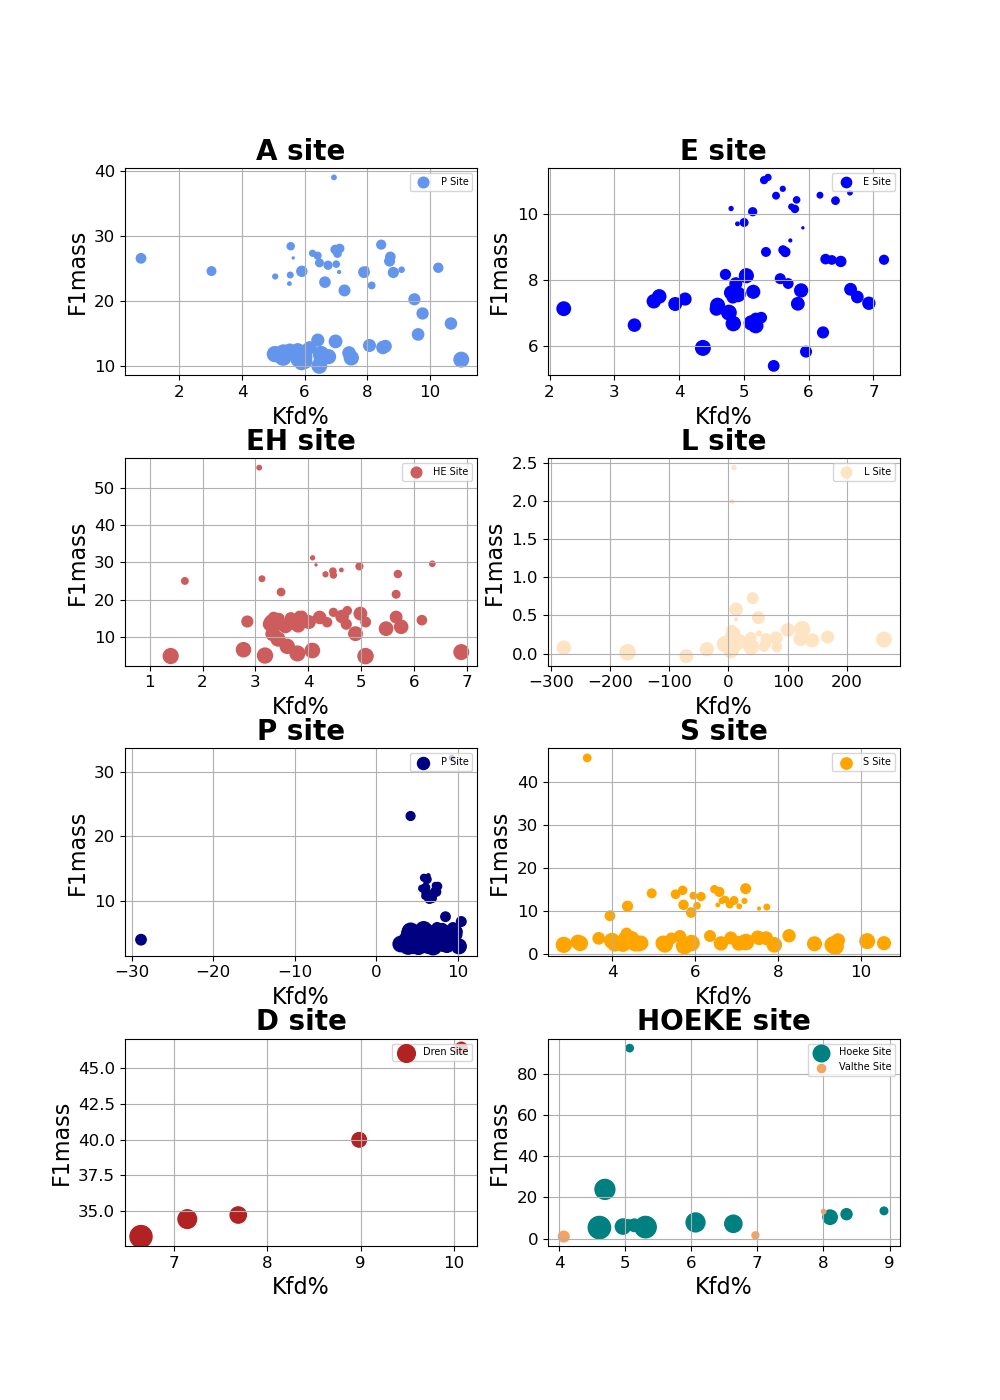

In [ ]:
import graphsf
fig, ((site1, site2), (site3, site4), (site5, site6), (site7, site8)) = plt.subplots(4, 2,  figsize=(10, 14))
fig.subplots_adjust(hspace=0.4)

site1.scatter(df.kfd[df['SAMPLE'].str.startswith("A")],  df.F1mass[df['SAMPLE'].str.startswith("A")], s=df.Depth[df['SAMPLE'].str.startswith("A")] ,c = "cornflowerblue", label = 'P Site')
site2.scatter(df.kfd[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")], s=df.Depth[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site' )


site6.scatter(df.kfd[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")], s=df.Depth[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
site5.scatter(df.kfd[df['SAMPLE'].str.startswith("P")], df.F1mass[df['SAMPLE'].str.startswith("P")], s=df.Depth[df['SAMPLE'].str.startswith("P")], c = "navy", label = 'P Site')
site3.scatter(df.kfd[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")], s=df.Depth[df['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
site4.scatter(df.kfd[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")], s=df.Depth[df['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
site7.scatter(df.kfd[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")], s=df.Depth[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
site8.scatter(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], s=df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

site8.scatter(df.kfd[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")], s=df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')

graphsf.sites(site1, site2, site3, site4, site5, site6, site7, site8, plt)

<IPython.core.display.Javascript object>


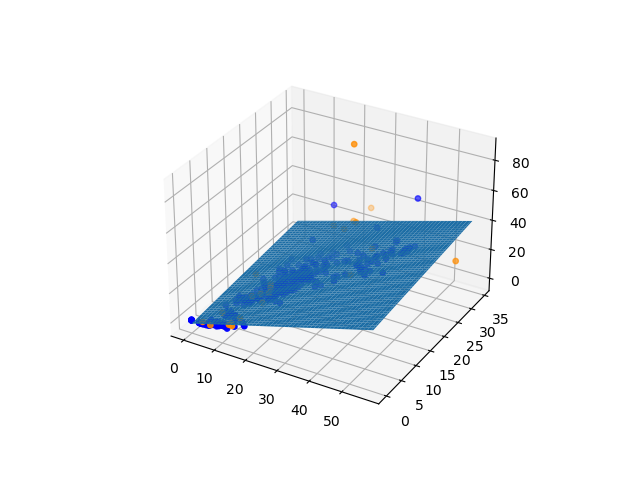

Susceptibility score 0.6662905494984459
coefficients of equation of plane, (a1, a2):  [0.60120581 0.28417551]
value of intercept, c: -2.375713407718937


In [ ]:
fig = plt.figure()
axa =  fig.add_subplot(projection = "3d")

s_array = df[['Pb', 'Cu']].to_numpy()
#print(df.Kre_F1)
reg = linear_model.LinearRegression().fit(s_array, df.F1mass)
print('Susceptibility score', reg.score(s_array, df.F1mass))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cu_ = np.linspace(df.Cu.min(), df.Cu.max(), 100)
pb_ = np.linspace(df.Pb.min(), df.Pb.max(), 100)

PB_, CU_ = np.meshgrid(pb_, cu_)

susc1_ = ptf.IOPsusc1(PB_, CU_)

axa.scatter(df.Pb[:23], df.Cu[:23], df.F3mass[:23],  c = "darkorange", s = 15, label = 'Arch')
axa.scatter(df.Pb[23:], df.Cu[23:], df.F3mass[23:],  c = "blue", s = 15, label = 'Agric')
axa.plot_surface(PB_, CU_, susc1_)
#axa.plot_surface(X, Y, cec_IOPped)

<IPython.core.display.Javascript object>


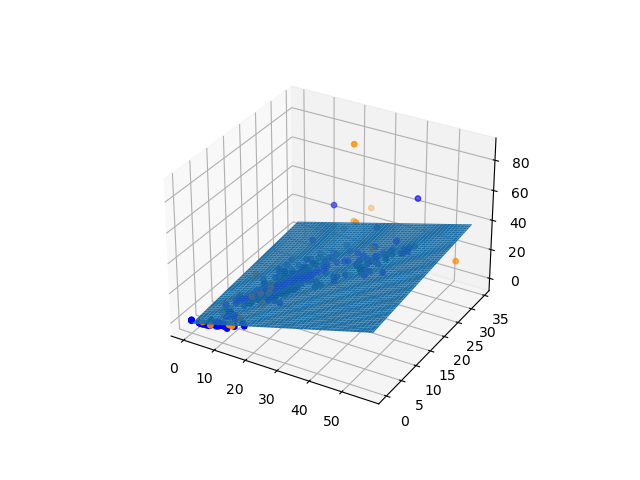

Susceptibility score 0.6656196423488225
coefficients of equation of plane, (a1, a2):  [0.57026916 0.26638581]
value of intercept, c: -2.2626152660618537


In [ ]:
fig = plt.figure()
axb =  fig.add_subplot(projection = "3d")

s_array = df[['Pb', 'Cu']].to_numpy()
#print(df.Kre_F1)
reg = linear_model.LinearRegression().fit(s_array, df.F3mass)
print('Susceptibility score', reg.score(s_array, df.F3mass))
print("coefficients of equation of plane, (a1, a2): ", reg.coef_)
print("value of intercept, c:", reg.intercept_)


cu_ = np.linspace(df.Cu.min(), df.Cu.max(), 100)
pb_ = np.linspace(df.Pb.min(), df.Pb.max(), 100)

PB_, CU_ = np.meshgrid(pb_, cu_)

susc2_ = ptf.IOPsusc2(PB_, CU_)

#df[(df.val > 0.5) & (df.val2 == 1)]

axb.scatter(df.Pb[:23], df.Cu[:23], df.F3mass[:23],  c = "darkorange", s = 15, label = 'Arch')
axb.scatter(df.Pb[23:], df.Cu[23:], df.F3mass[23:],  c = "blue", s = 15, label = 'Agric')

axb.plot_surface(PB_, CU_, susc2_)
#axa.plot_surface(X, Y, cec_IOPped)

<IPython.core.display.Javascript object>


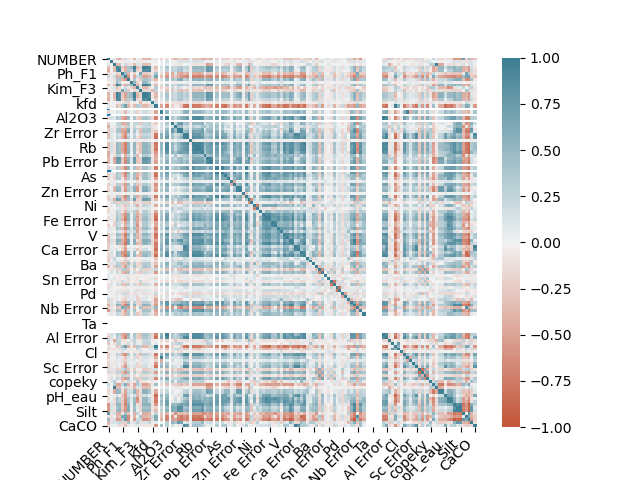

<AxesSubplot:xlabel='Kre_F1', ylabel='kfd'>

In [ ]:
df.plot.scatter(x="Kre_F1", y="kfd"  )


In [ ]:
corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

f = (3.790536 + 3.699295 + 3.531568 + 3.752891 + 3.814403)/5
print(f)
plt.figure(figsize=(20, 20))
plt.show()

NameError: name 'df' is not defined

<IPython.core.display.Javascript object>


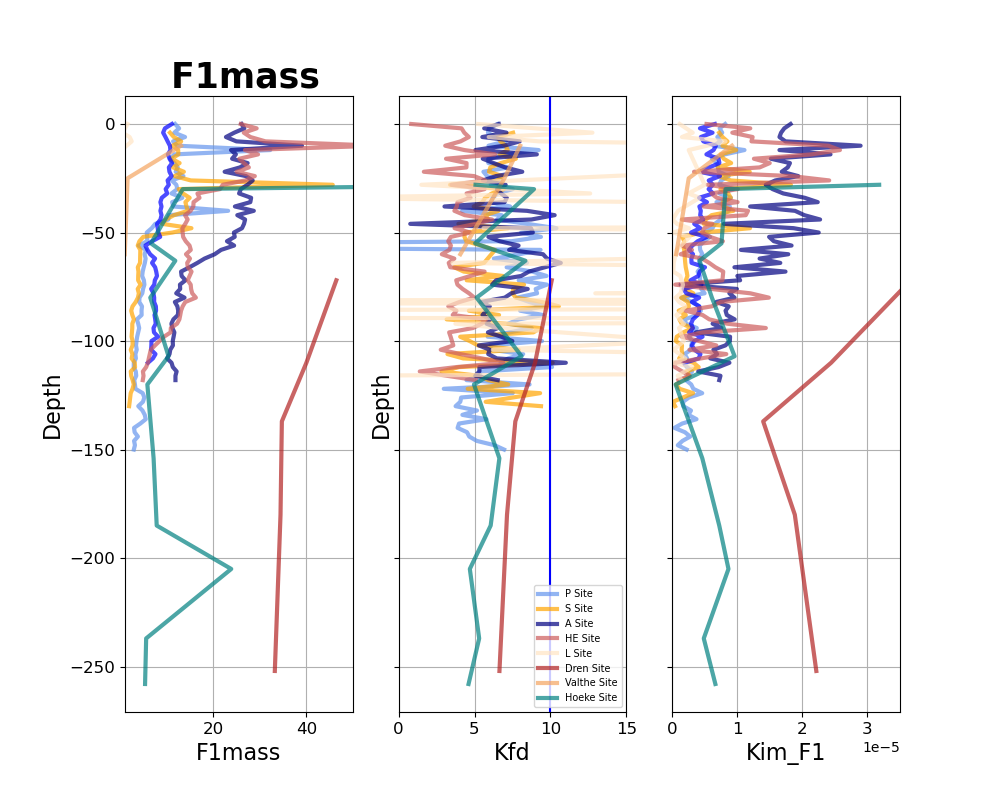

Text(0.5, 0, 'Kim_F1')

In [ ]:
import graphsf
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(10, 8))
a=0.7
lw=3

xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc1.plot(df.F1mass[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.plot(df.kfd[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")], alpha=a,linewidth=lw, c = "orange", label = 'S Site')
#xc2.plot(df.kfd[df['SAMPLE'].str.startswith("E0")&('E1')], -df.Depth[df['SAMPLE'].str.startswith("E")&('E1')], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc2.plot(df.kfd[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')

xc2.set_ylabel('Depth', fontsize = 16) 
xc2.set_xlabel('Kfd', fontsize = 16) 
xc2.legend(loc='lower right', fontsize = 7)
xc2.set_xlim(0, 15) 
xc2.axvline(x = 10, color = 'b')


xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw, c = "orange", label = 'S Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], alpha=a,linewidth=lw,c = "navy", label = 'A Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw, c = "indianred", label = 'HE Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], alpha=a,linewidth=lw,c = "bisque", label = 'L Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")],  alpha=a,linewidth=lw ,c = "firebrick", label = 'Dren Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc3.plot(df.Kim_F1[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw, c = "teal", label = 'Hoeke Site')

graphsf.prof(xc1, xc2, xc3, plt)

xc1.set_xlim(1, 50) 
xc1.set_xlabel('F1mass', fontsize = 16) 

xc3.set_xlim(0, 3.5*10**-5) 
xc3.set_xlabel('Kim_F1', fontsize = 16) 

<IPython.core.display.Javascript object>


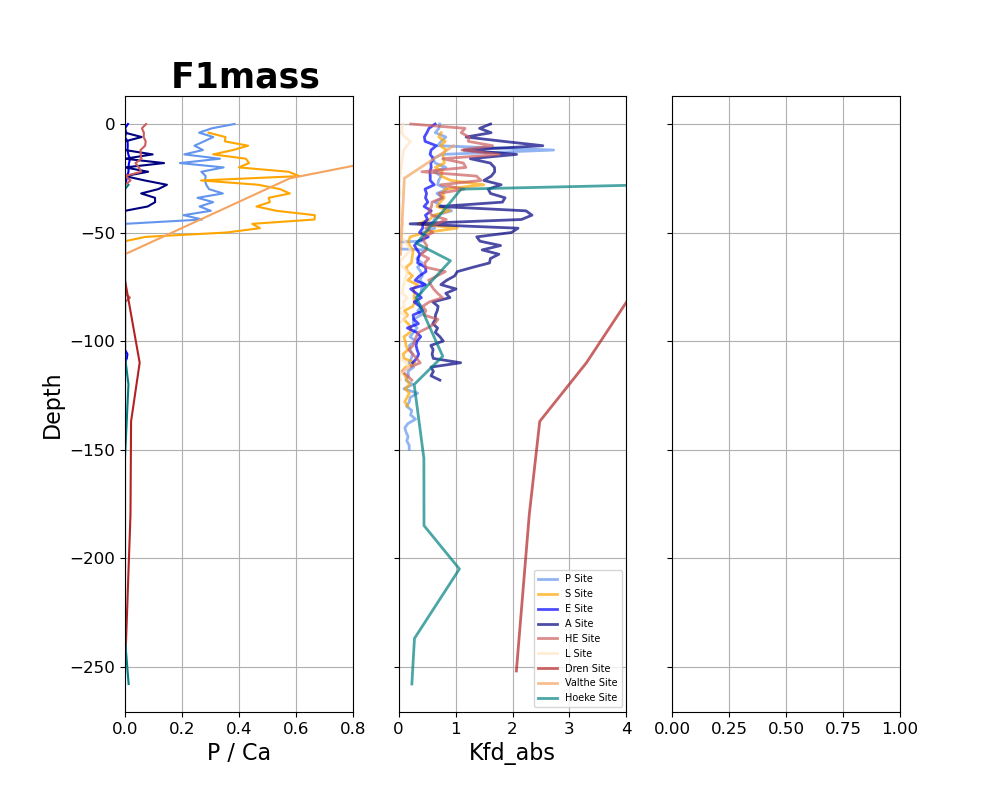

Text(0.5, 0, 'P / Ca')

In [ ]:
import graphsf
fig, ((xc1, xc2, xc3)) = plt.subplots(1, 3, sharey=True, figsize=(10, 8))

lw = 2
xc1.plot(df.P[df['SAMPLE'].str.startswith("P")]/df.Ca[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")],  c = "cornflowerblue", label = 'P Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("S")]/df.Ca[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("E")]/df.Ca[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site' )
xc1.plot(df.P[df['SAMPLE'].str.startswith("A")]/df.Ca[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")], c = "navy", label = 'A Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("HE")]/df.Ca[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], c = "indianred", label = 'HE Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("L")]/df.Ca[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")], c = "bisque", label = 'L Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("D")]/df.Ca[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("V")]/df.Ca[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
xc1.plot(df.P[df['SAMPLE'].str.startswith("HOEKE")]/df.Ca[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')

xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("P")], -df.Depth[df['SAMPLE'].str.startswith("P")], alpha=a,linewidth=lw, c = "cornflowerblue", label = 'P Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("S")], -df.Depth[df['SAMPLE'].str.startswith("S")],  alpha=a,linewidth=lw,c = "orange", label = 'S Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("E")], -df.Depth[df['SAMPLE'].str.startswith("E")], alpha=a,linewidth=lw, c = "blue", label = 'E Site' )
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("A")], -df.Depth[df['SAMPLE'].str.startswith("A")],alpha=a,linewidth=lw, c = "navy", label = 'A Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("HE")], -df.Depth[df['SAMPLE'].str.startswith("HE")], alpha=a,linewidth=lw,c = "indianred", label = 'HE Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("L")], -df.Depth[df['SAMPLE'].str.startswith("L")],alpha=a,linewidth=lw, c = "bisque", label = 'L Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("D")], -df.Depth[df['SAMPLE'].str.startswith("D")], alpha=a,linewidth=lw, c = "firebrick", label = 'Dren Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("V")], -df.Depth[df['SAMPLE'].str.startswith("V")], alpha=a,linewidth=lw, c = "sandybrown", label = 'Valthe Site')
xc2.plot(df.kfd_abs[df['SAMPLE'].str.startswith("HOEKE")], -df.Depth[df['SAMPLE'].str.startswith("HOEKE")],  alpha=a,linewidth=lw,c = "teal", label = 'Hoeke Site')


graphsf.prof(xc1, xc2, xc3, plt)

xc2.set_xlabel('Kfd_abs', fontsize = 16) 
xc2.legend(loc='lower right', fontsize = 7)
xc2.set_xlim(0, 4) 

#xc1.xscale('symlog')
xc1.set_xlim(0, 0.8) 
xc1.set_xlabel('P / Ca', fontsize = 16) 


<IPython.core.display.Javascript object>


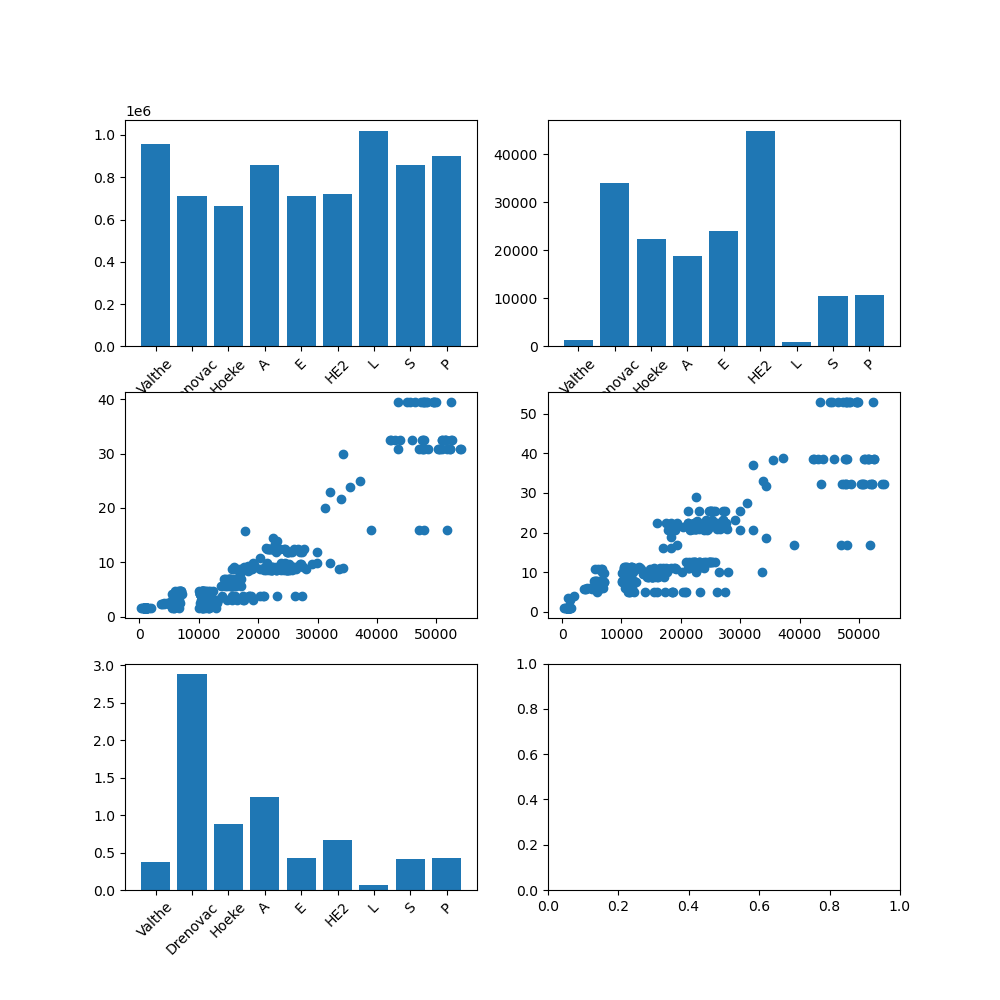

<ipython-input-14-631ebc1884e7>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sites, rotation=45)
<ipython-input-14-631ebc1884e7>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sites, rotation=45)
<ipython-input-14-631ebc1884e7>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(sites, rotation=45)


[Text(0, 0, 'Valthe'),
 Text(1, 0, 'Drenovac'),
 Text(2, 0, 'Hoeke'),
 Text(3, 0, 'A'),
 Text(4, 0, 'E'),
 Text(5, 0, 'HE2'),
 Text(6, 0, 'L'),
 Text(7, 0, 'S'),
 Text(8, 0, 'P')]

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

sites =  ['Valthe', 'Drenovac', 'Hoeke', 'A', 'E', 'HE2', 'L', 'S', 'P']
sio2 =   [df.SiO2[df['SAMPLE'].str.startswith("V")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("D")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("A")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("E")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("HE")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("L")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("S")].mean(),
         df.SiO2[df['SAMPLE'].str.startswith("P")].mean()]

Fe =   [df.Fe[df['SAMPLE'].str.startswith("V")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("D")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("A")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("E")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("HE")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("L")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("S")].mean(),
         df.Fe[df['SAMPLE'].str.startswith("P")].mean()]

Kabs =   [df.kfd_abs[df['SAMPLE'].str.startswith("V")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("D")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("HOEK")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("A")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("E")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("HE")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("L")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("S")].mean(),
         df.kfd_abs[df['SAMPLE'].str.startswith("P")].mean()]

ax1.bar(sites, sio2)
ax1.set_xticklabels(sites, rotation=45)

ax2.bar(sites, Fe)
ax2.set_xticklabels(sites, rotation=45)

ax3.scatter(df.Fe, df.CEC)


ax4.scatter(df.Fe, df.Clay)

ax5.bar(sites, Kabs)
ax5.set_xticklabels(sites, rotation=45)


#ax6.bar(sites, bound)
#ax6.set_xticklabels(sites, rotation=45)

<IPython.core.display.Javascript object>


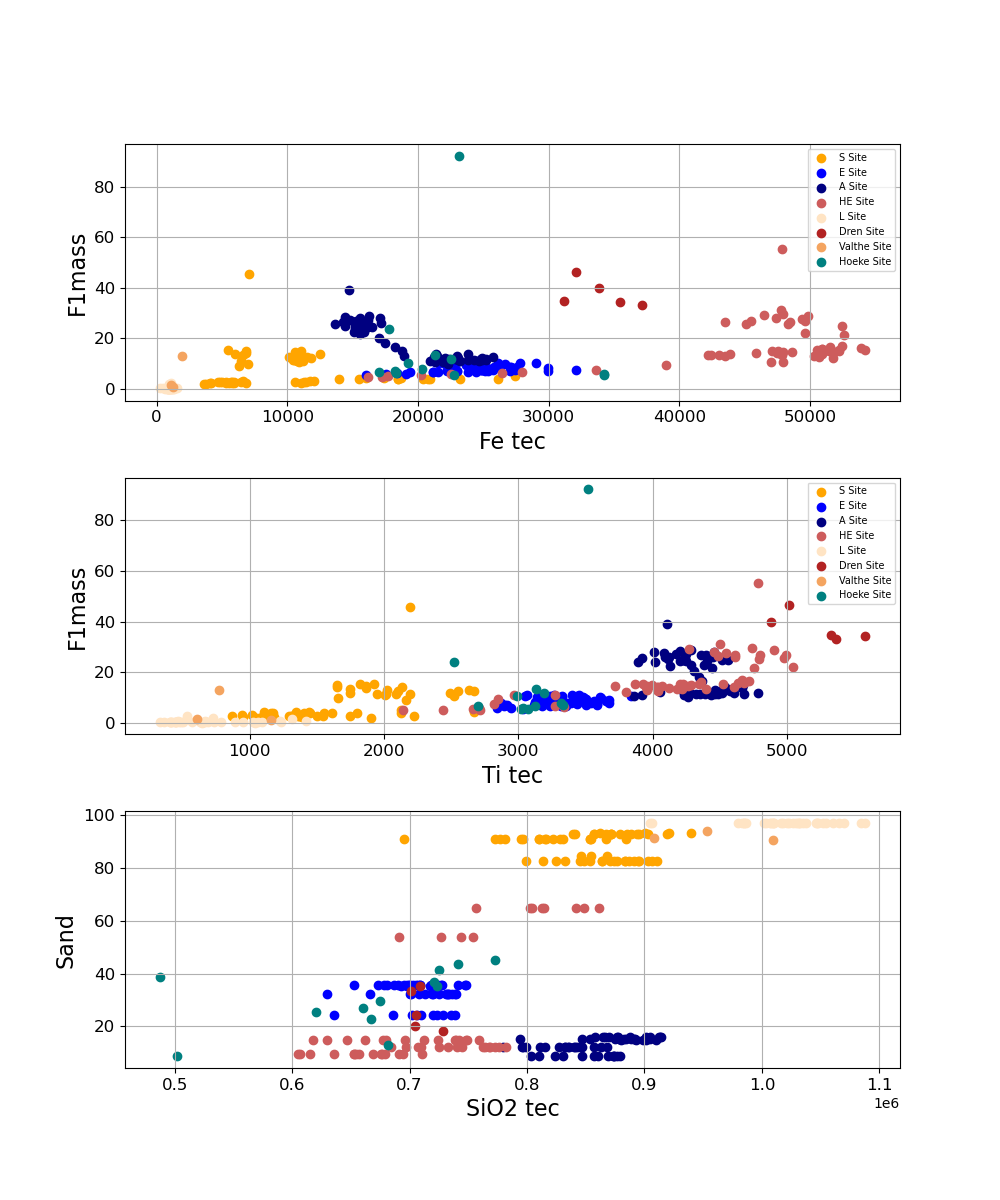

In [ ]:
import graphsf
fig, ((rx1, rx2, rx3)) = plt.subplots(3, 1,  figsize=(10, 12))
fig.subplots_adjust(hspace=0.3)

rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("A")], df.F1mass[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')

rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx1.scatter(df.Fe[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("S")], df.F1mass[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("E")], df.F1mass[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("A")], df.F1mass[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("HE")], df.F1mass[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')

rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("L")], df.F1mass[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("D")], df.F1mass[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("V")], df.F1mass[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx2.scatter(df.Ti[df['SAMPLE'].str.startswith("HOEKE")], df.F1mass[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("S")], df.Sand[df['SAMPLE'].str.startswith("S")],  c = "orange", label = 'S Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("E")], df.Sand[df['SAMPLE'].str.startswith("E")],  c = "blue", label = 'E Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("A")], df.Sand[df['SAMPLE'].str.startswith("A")],  c = "navy", label = 'A Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("HE")], df.Sand[df['SAMPLE'].str.startswith("HE")],  c = "indianred", label = 'HE Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("L")], df.Sand[df['SAMPLE'].str.startswith("L")],  c = "bisque", label = 'L Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("D")], df.Sand[df['SAMPLE'].str.startswith("D")],  c = "firebrick", label = 'Dren Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("V")], df.Sand[df['SAMPLE'].str.startswith("V")],  c = "sandybrown", label = 'Valthe Site')
rx3.scatter(df.SiO2[df['SAMPLE'].str.startswith("HOEKE")], df.Sand[df['SAMPLE'].str.startswith("HOEKE")],  c = "teal", label = 'Hoeke Site')


graphsf.elem(rx1, rx2, rx3, plt)